In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [4]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'

In [5]:
r = np.arange(0.5, 10, 0.001)
sig_11 = 1.0
sig_22 = 3.0
eps_11 = 1.0
eps_22 = 0.5
sig_12 = np.sqrt(sig_11*sig_22)
eps_12 = np.sqrt(eps_11*eps_22)
E11 = 4*eps_11*((sig_11/r)**12-(sig_11/r)**6)
E22 = 4*eps_22*((sig_22/r)**12-(sig_22/r)**6)
E12 = 4*eps_12*((sig_12/r)**12-(sig_12/r)**6)

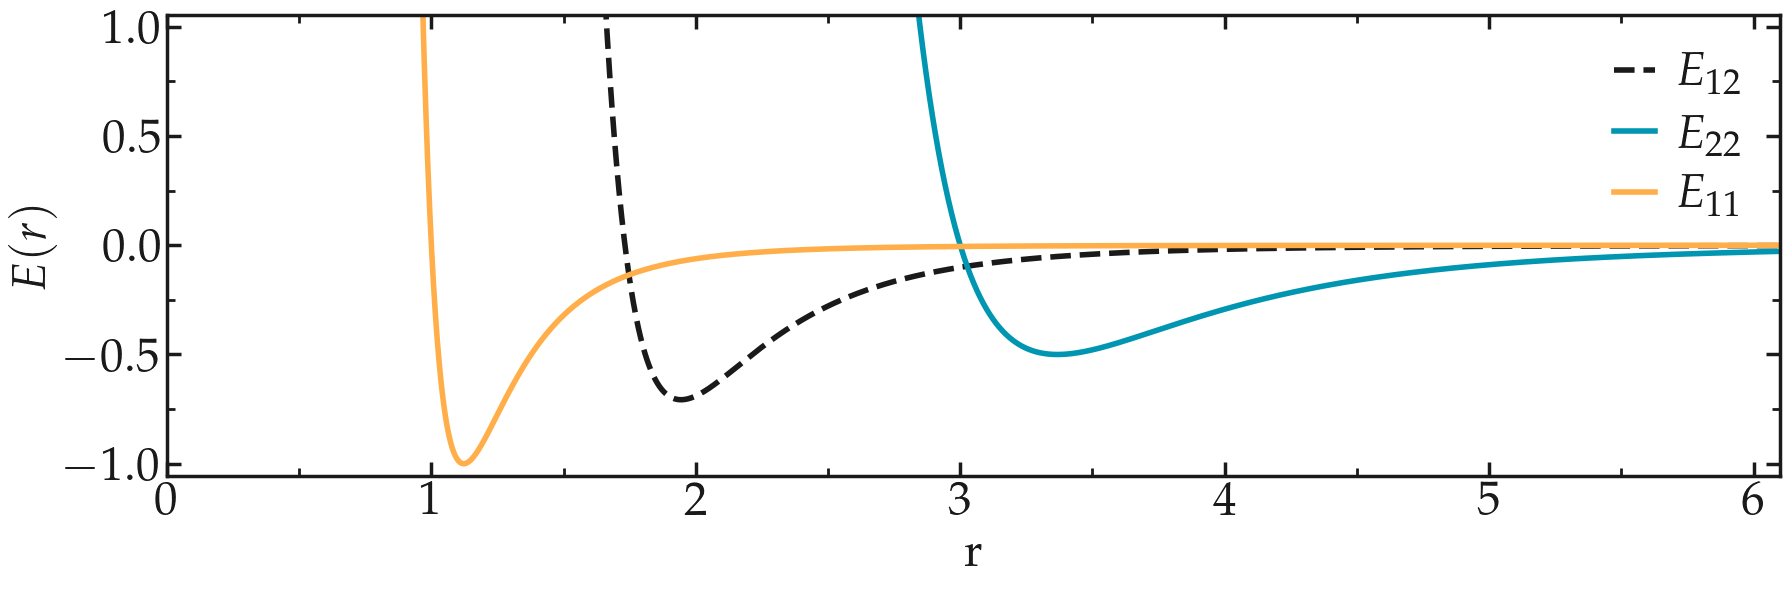

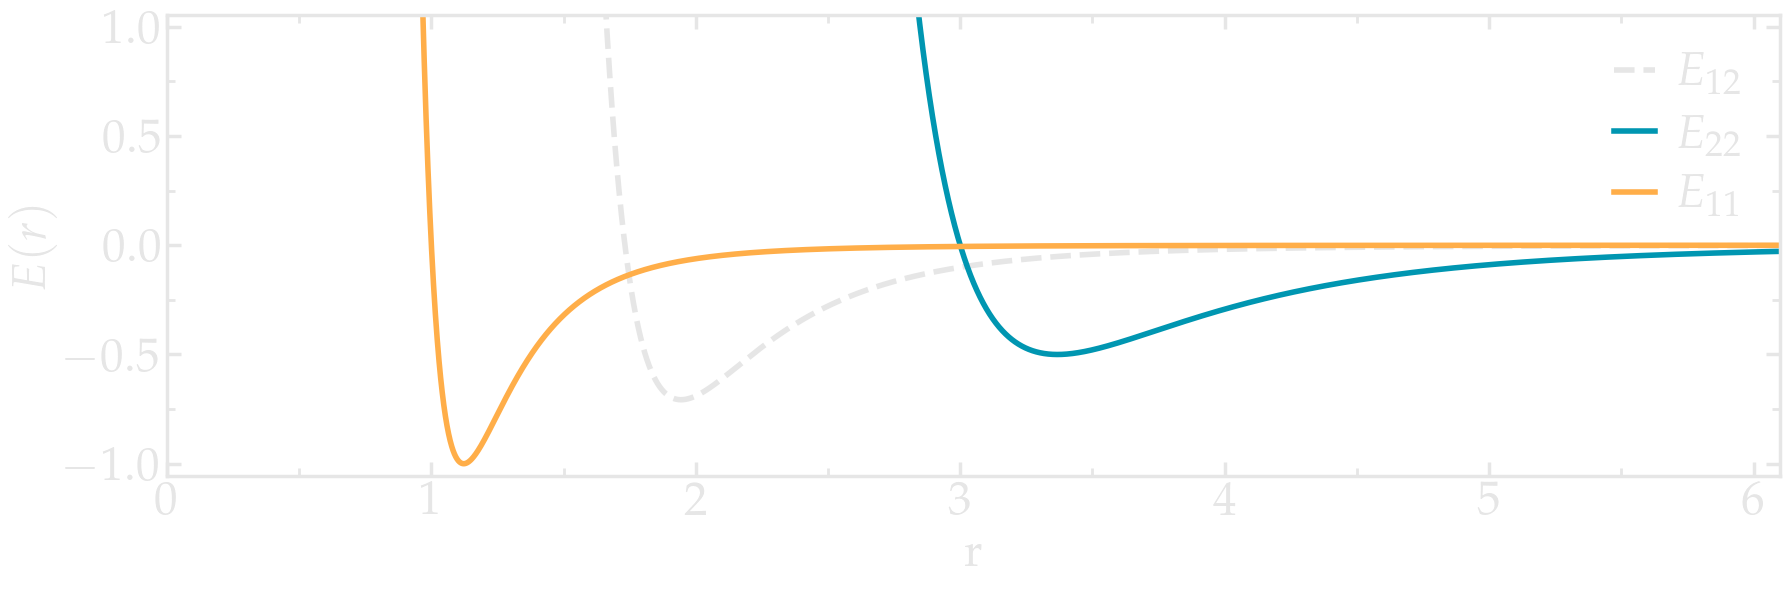

In [6]:
filename = "lennard-jones"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(r, E12, '--', color=mygray, linewidth=4, label=r'$E_{12}$')
    ax[-1].plot(r, E22, color=colors["myblue"], linewidth=4, label=r'$E_{22}$')
    ax[-1].plot(r, E11, color=colors["myorange"], linewidth=4, label=r'$E_{11}$')
    complete_panel(ax[-1], r'r', r'$E (r)$', legend=True, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 6.1, 1), x_boundaries=(0, 6.1),
                   y_ticks=np.arange(-1., 1.25, 0.5), y_boundaries=(-1.055, 1.055))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)